In [1]:
import pandas as pd
pd.set_option('display.max_columns', 500)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv("D:\\Python for data science\\Practice\\Analytics Vidhya\\Loan Delinquency Prediction- 15th Aug\\train_u5jK80M\\train.csv")

df3 = pd.read_csv("D:\\Python for data science\\Practice\\Analytics Vidhya\\Loan Delinquency Prediction- 15th Aug\\test_3BA6GZX\\test.csv")

In [243]:
df3 = df2

In [245]:
u = df1.select_dtypes(include='float64').columns.tolist()

for col in u:
    df1[u] = df1[u].astype('int64')

df1['origination_date'] = pd.to_datetime(df1['origination_date'],format='%Y-%m-%d')

df1['first_payment_date']=pd.to_datetime(df1['first_payment_date'])

#Drop Load ID and financial_institution column

df1= df1.drop(['loan_id','financial_institution'],axis=1)

v = df1.select_dtypes(include='object').columns.tolist()

for col in v:
    new = pd.get_dummies(df1[col],prefix=col)
    df1 = pd.concat([df1,new],axis=1)
    

In [246]:
#Drop Original object columns as we have applied pd.get_dummies on those
df = df1.drop(['source','loan_purpose'],axis=1)

In [247]:
df_final = df

In [248]:
df.head()

,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4,214000,360,2012-03-01,2012-05-01,95,1,22,694,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,4,144000,360,2012-01-01,2012-03-01,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,3,366000,180,2012-01-01,2012-03-01,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,4,135000,360,2012-02-01,2012-04-01,46,2,44,633,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
4,4,124000,360,2012-02-01,2012-04-01,80,1,43,681,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1


In [249]:
X = df.drop(['origination_date','first_payment_date','m13'],axis=1)
y=df['m13']

In [250]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [161]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [162]:
pred = LR.predict(X_val)

In [163]:
from sklearn.metrics import classification_report,confusion_matrix,roc_auc_score,accuracy_score,precision_score,recall_score

In [164]:
print(roc_auc_score(y_val,pred))
print(classification_report(y_val,pred))
print('\n')
print(confusion_matrix(y_val,pred))



0.4997636988998871
             precision    recall  f1-score   support

          0       0.99      1.00      1.00     38087
          1       0.00      0.00      0.00       213

avg / total       0.99      0.99      0.99     38300



[[38069    18]
 [  213     0]]


In [165]:
df['m13'].value_counts()

0    115422
1       636
Name: m13, dtype: int64

# Smote Process to handle imbalanced dataset

In [252]:
col = X_train.columns

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_os , y_os = os.fit_sample(X_train,y_train)

X_train = pd.DataFrame(data=x_os,columns=col)
y_train = pd.DataFrame(data=y_os,columns=['m13'])

In [167]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [168]:
pred = LR.predict(X_val)

In [169]:
print(roc_auc_score(y_val,pred))
print('\n')
print(classification_report(y_val,pred))
print('\n')
print(confusion_matrix(y_val,pred))



0.8047335042540978


             precision    recall  f1-score   support

          0       1.00      0.93      0.96     38087
          1       0.05      0.68      0.09       213

avg / total       0.99      0.93      0.96     38300



[[35372  2715]
 [   68   145]]


# More Feature Engineering is required now

In [41]:
df.head()

,interest_rate,unpaid_principal_bal,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86
0,4,214000,360,2012-03-01,2012-05-01,95,1,22,694,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1
1,4,144000,360,2012-01-01,2012-03-01,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0
2,3,366000,180,2012-01-01,2012-03-01,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0
3,4,135000,360,2012-02-01,2012-04-01,46,2,44,633,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0
4,4,124000,360,2012-02-01,2012-04-01,80,1,43,681,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1


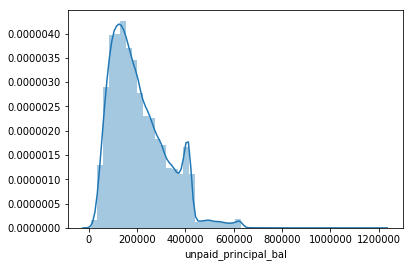

In [42]:
sns.distplot(df['unpaid_principal_bal'])

In [253]:
df['unpaid_principal_bal_log'] = np.log(df['unpaid_principal_bal'])

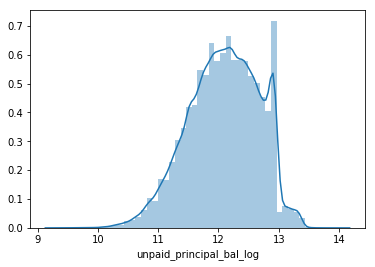

In [171]:
sns.distplot(df['unpaid_principal_bal_log'])

In [254]:
df.drop(['unpaid_principal_bal'],axis=1,inplace=True)

In [255]:
df_final2 = df

In [256]:
X = df.drop(['origination_date','first_payment_date','m13'],axis=1)
y=df['m13']

In [257]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [258]:
col = X_train.columns

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
x_os , y_os = os.fit_sample(X_train,y_train)

X_train = pd.DataFrame(data=x_os,columns=col)
y_train = pd.DataFrame(data=y_os,columns=['m13'])

In [177]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [178]:
pred = LR.predict(X_val)

In [179]:
print(roc_auc_score(y_val,pred))
print('\n')
print(classification_report(y_val,pred))
print('\n')
print(confusion_matrix(y_val,pred))



0.7994881622024003


             precision    recall  f1-score   support

          0       1.00      0.98      0.99     38087
          1       0.14      0.62      0.23       213

avg / total       0.99      0.98      0.98     38300



[[37297   790]
 [   81   132]]


In [180]:
roc_auc_score(y_val,pred)

0.7994881622024003

## Feature Scaling

In [79]:
X = df.drop(['origination_  date','first_payment_date','m13'],axis=1)
y=df['m13']

In [80]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
col = X_train.columns

from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=32)
x_os , y_os = os.fit_sample(X_train,y_train)

X_train = pd.DataFrame(data=x_os,columns=col)
y_train = pd.DataFrame(data=y_os,columns=['m13'])

In [57]:
from sklearn.preprocessing import StandardScaler
slc= StandardScaler()

col = X_train.columns

X_train = slc.fit_transform(X_train)

X_train = pd.DataFrame(X_train,columns=col)

In [58]:
LR.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [59]:
pred = LR.predict(X_val)

In [60]:
print(roc_auc_score(y_val,pred))
print('\n')
print(classification_report(y_val,pred))
print('\n')
print(confusion_matrix(y_val,pred))

0.5


             precision    recall  f1-score   support

          0       0.99      1.00      1.00     38087
          1       0.00      0.00      0.00       213

avg / total       0.99      0.99      0.99     38300



[[38087     0]
 [  213     0]]


### Feature Scaling Does not help here

In [61]:
df.head()

,interest_rate,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,unpaid_principal_bal_log
0,4,360,2012-03-01,2012-05-01,95,1,22,694,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,12.273731
1,4,360,2012-01-01,2012-03-01,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,11.877569
2,3,180,2012-01-01,2012-03-01,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,12.810389
3,4,360,2012-02-01,2012-04-01,46,2,44,633,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,11.813030
4,4,360,2012-02-01,2012-04-01,80,1,43,681,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1,11.728037


# With XGBoost

In [93]:
df.head()

,interest_rate,loan_term,origination_date,first_payment_date,loan_to_value,number_of_borrowers,debt_to_income_ratio,borrower_credit_score,insurance_percent,co-borrower_credit_score,insurance_type,m1,m2,m3,m4,m5,m6,m7,m8,m9,m10,m11,m12,m13,source_X,source_Y,source_Z,loan_purpose_A23,loan_purpose_B12,loan_purpose_C86,unpaid_principal_bal_log
0,4,360,2012-03-01,2012-05-01,95,1,22,694,30,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,12.273731
1,4,360,2012-01-01,2012-03-01,72,1,44,697,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,11.877569
2,3,180,2012-01-01,2012-03-01,49,1,33,780,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,12.810389
3,4,360,2012-02-01,2012-04-01,46,2,44,633,0,638,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,0,0,0,1,0,11.813030
4,4,360,2012-02-01,2012-04-01,80,1,43,681,0,0,0,0,1,2,3,4,5,6,7,8,9,10,11,1,1,0,0,0,0,1,11.728037


In [259]:
dtrain= df
import xgboost as xgb
from sklearn import cross_validation, metrics
from sklearn.grid_search import GridSearchCV 
train = dtrain
target = 'm13'

In [260]:
def modelfit(alg, dtrain, predictors,useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'],
                          nfold=cv_folds,metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain['m13'],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(dtrain['m13'].values, dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(dtrain['m13'], dtrain_predprob))


In [261]:
predictors = [x for x in df.columns if x not in ['origination_date','first_payment_date','m13']]

In [99]:
#Choose all predictors except target & IDcols
predictors = [x for x in df.columns if x not in ['origination_date','first_payment_date','m13']]
xgb2 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=5, min_child_weight=1, gamma=0, subsample=0.8,
                     colsample_bytree=0.8, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
modelfit(xgb2, df, predictors)

D:\Python\Installation\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:



Model Report
Accuracy : 0.9969
AUC Score (Train): 0.927812


In [100]:
param_test1 = { 'max_depth':list(range(3,10,2)), 'min_child_weight':list(range(1,6,2))}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
                                                  min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
                                                  objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.88975, std: 0.00762, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.88847, std: 0.00783, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.88646, std: 0.00766, params: {'max_depth': 3, 'min_child_weight': 5},
  mean: 0.88611, std: 0.00784, params: {'max_depth': 5, 'min_child_weight': 1},
  mean: 0.88426, std: 0.00679, params: {'max_depth': 5, 'min_child_weight': 3},
  mean: 0.88372, std: 0.00760, params: {'max_depth': 5, 'min_child_weight': 5},
  mean: 0.88182, std: 0.00663, params: {'max_depth': 7, 'min_child_weight': 1},
  mean: 0.88222, std: 0.00684, params: {'max_depth': 7, 'min_child_weight': 3},
  mean: 0.87864, std: 0.00809, params: {'max_depth': 7, 'min_child_weight': 5},
  mean: 0.87991, std: 0.01227, params: {'max_depth': 9, 'min_child_weight': 1},
  mean: 0.87811, std: 0.01352, params: {'max_depth': 9, 'min_child_weight': 3},
  mean: 0.87783, std: 0.00898, params: {'max_depth': 9, 'min_child_weight': 5}],
 {'max_depth': 3, 'min_child_weight': 1

In [101]:
param_test2 = { 'max_depth':[2,3,4], 'min_child_weight':[0,1,2,3] }
gsearch2 = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=5,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.89161, std: 0.00934, params: {'max_depth': 2, 'min_child_weight': 0},
  mean: 0.89198, std: 0.00859, params: {'max_depth': 2, 'min_child_weight': 1},
  mean: 0.89170, std: 0.00935, params: {'max_depth': 2, 'min_child_weight': 2},
  mean: 0.89229, std: 0.00901, params: {'max_depth': 2, 'min_child_weight': 3},
  mean: 0.88916, std: 0.00648, params: {'max_depth': 3, 'min_child_weight': 0},
  mean: 0.88975, std: 0.00762, params: {'max_depth': 3, 'min_child_weight': 1},
  mean: 0.89014, std: 0.00821, params: {'max_depth': 3, 'min_child_weight': 2},
  mean: 0.88847, std: 0.00783, params: {'max_depth': 3, 'min_child_weight': 3},
  mean: 0.88757, std: 0.00702, params: {'max_depth': 4, 'min_child_weight': 0},
  mean: 0.88891, std: 0.00911, params: {'max_depth': 4, 'min_child_weight': 1},
  mean: 0.88882, std: 0.00770, params: {'max_depth': 4, 'min_child_weight': 2},
  mean: 0.88774, std: 0.00583, params: {'max_depth': 4, 'min_child_weight': 3}],
 {'max_depth': 2, 'min_child_weight': 3

In [106]:
param_test2b = {
 'min_child_weight':[1,2,3,4,5]
}
gsearch2b = GridSearchCV(estimator = XGBClassifier( learning_rate=0.1, n_estimators=140, max_depth=8,
 min_child_weight=2, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test2b, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2b.fit(train[predictors],train[target])
gsearch2b.grid_scores_, gsearch2b.best_params_, gsearch2b.best_score_

([mean: 0.87849, std: 0.01010, params: {'min_child_weight': 1},
  mean: 0.87939, std: 0.00872, params: {'min_child_weight': 2},
  mean: 0.87792, std: 0.00654, params: {'min_child_weight': 3},
  mean: 0.87750, std: 0.00611, params: {'min_child_weight': 4},
  mean: 0.87715, std: 0.00709, params: {'min_child_weight': 5}],
 {'min_child_weight': 2},
 0.8793860863695983)

In [107]:
param_test3 = {
 'gamma':[i/10.0 for i in range(0,5)]
}
gsearch3 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.87775, std: 0.00983, params: {'gamma': 0.0},
  mean: 0.87575, std: 0.00838, params: {'gamma': 0.1},
  mean: 0.87635, std: 0.00610, params: {'gamma': 0.2},
  mean: 0.87897, std: 0.00923, params: {'gamma': 0.3},
  mean: 0.87566, std: 0.00820, params: {'gamma': 0.4}],
 {'gamma': 0.3},
 0.8789658430170334)

In [262]:
param_test4 = {
 'subsample':[i/10.0 for i in range(6,10)],
 'colsample_bytree':[i/10.0 for i in range(6,10)]
}
gsearch4 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target]).
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87240, std: 0.00964, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.87219, std: 0.00797, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.87382, std: 0.00978, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.87692, std: 0.00922, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.86971, std: 0.00868, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.87128, std: 0.00879, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.87084, std: 0.00898, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.87378, std: 0.01021, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.87322, std: 0.00743, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87369, std: 0.00810, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.87569, std: 0.00876, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.87523, std: 0.01209, params: {'colsample_bytree': 0.8, 'subsample'

In [265]:
x= [i/10.0 for i in range(5,8)]
x

[0.5, 0.6, 0.7]

In [266]:
param_test4a = {
 'subsample':[i/10.0 for i in range(9,12)],
 'colsample_bytree':[i/10.0 for i in range(5,8)]
}
gsearch4a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch4.fit(train[predictors],train[target])
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.87240, std: 0.00964, params: {'colsample_bytree': 0.6, 'subsample': 0.6},
  mean: 0.87219, std: 0.00797, params: {'colsample_bytree': 0.6, 'subsample': 0.7},
  mean: 0.87382, std: 0.00978, params: {'colsample_bytree': 0.6, 'subsample': 0.8},
  mean: 0.87692, std: 0.00922, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.86971, std: 0.00868, params: {'colsample_bytree': 0.7, 'subsample': 0.6},
  mean: 0.87128, std: 0.00879, params: {'colsample_bytree': 0.7, 'subsample': 0.7},
  mean: 0.87084, std: 0.00898, params: {'colsample_bytree': 0.7, 'subsample': 0.8},
  mean: 0.87378, std: 0.01021, params: {'colsample_bytree': 0.7, 'subsample': 0.9},
  mean: 0.87322, std: 0.00743, params: {'colsample_bytree': 0.8, 'subsample': 0.6},
  mean: 0.87369, std: 0.00810, params: {'colsample_bytree': 0.8, 'subsample': 0.7},
  mean: 0.87569, std: 0.00876, params: {'colsample_bytree': 0.8, 'subsample': 0.8},
  mean: 0.87523, std: 0.01209, params: {'colsample_bytree': 0.8, 'subsample'

In [271]:
[i/100.0 for i in range(55,70,5)]

[0.55, 0.6, 0.65]

In [272]:
param_test5 = {
 'subsample':[i/100.0 for i in range(85,105,5)],
 'colsample_bytree':[i/100.0 for i in range(55,70,5)]
}
gsearch5 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch5.fit(train[predictors],train[target])
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.87491, std: 0.00910, params: {'colsample_bytree': 0.55, 'subsample': 0.85},
  mean: 0.87753, std: 0.01226, params: {'colsample_bytree': 0.55, 'subsample': 0.9},
  mean: 0.87438, std: 0.01080, params: {'colsample_bytree': 0.55, 'subsample': 0.95},
  mean: 0.87826, std: 0.01131, params: {'colsample_bytree': 0.55, 'subsample': 1.0},
  mean: 0.87711, std: 0.01061, params: {'colsample_bytree': 0.6, 'subsample': 0.85},
  mean: 0.87578, std: 0.01006, params: {'colsample_bytree': 0.6, 'subsample': 0.9},
  mean: 0.87628, std: 0.00988, params: {'colsample_bytree': 0.6, 'subsample': 0.95},
  mean: 0.87640, std: 0.01116, params: {'colsample_bytree': 0.6, 'subsample': 1.0},
  mean: 0.87663, std: 0.01039, params: {'colsample_bytree': 0.65, 'subsample': 0.85},
  mean: 0.87546, std: 0.01172, params: {'colsample_bytree': 0.65, 'subsample': 0.9},
  mean: 0.87790, std: 0.00970, params: {'colsample_bytree': 0.65, 'subsample': 0.95},
  mean: 0.87516, std: 0.00812, params: {'colsample_bytree': 0.6

In [ ]:
param_test6 = {
 'reg_alpha':[1e-5, 1e-2, 0.1, 1, 100]
}
gsearch6 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6.fit(train[predictors],train[target])
gsearch6.grid_scores_, gsearch6.best_params_, gsearch6.best_score_

In [ ]:
param_test6a = {
 'reg_alpha':[1,2,3,4,5]
}
gsearch6a = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=177, max_depth=8,
 min_child_weight=6, gamma=0.1, subsample=0.95, colsample_bytree=0.95,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1,seed=27), 
 param_grid = param_test6a, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch6a.fit(train[predictors],train[target])
gsearch6a.grid_scores_, gsearch6a.best_params_, gsearch6a.best_score_

In [108]:
from xgboost.sklearn import XGBClassifier
#xgb1 = XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=8, min_child_weight=6, gamma=0.1, subsample=0.95,
                     #colsample_bytree=0.95, reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)
xgb1=XGBClassifier(learning_rate =0.1, n_estimators=1000, max_depth=2, min_child_weight=2, gamma=0.3, subsample=0.9,
                     colsample_bytree=0.95,reg_alpha=2, objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27)

In [109]:
xgb1.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=0.95, gamma=0.3,
       learning_rate=0.1, max_delta_step=0, max_depth=2,
       min_child_weight=2, missing=None, n_estimators=1000, n_jobs=1,
       nthread=4, objective='binary:logistic', random_state=0, reg_alpha=2,
       reg_lambda=1, scale_pos_weight=1, seed=27, silent=None,
       subsample=0.9, verbosity=1)

In [111]:
pred = xgb1.predict(X_val)

D:\Python\Installation\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [112]:
print(roc_auc_score(y_val,pred))
print('\n')
print(accuracy_score(y_val,pred))
print('\n')
print(confusion_matrix(y_val,pred))
print('\n')
print(classification_report(y_val,pred))

0.696749879908009


0.9957702349869452


[[38054    33]
 [  129    84]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00     38087
          1       0.72      0.39      0.51       213

avg / total       1.00      1.00      1.00     38300



# Questions

1. Here with XGBoost, why recall abd precision showing 1 ?
2. How can increase auc_roc score ?

3. How can i make count less for FP and FN ?
4. Why feature scaling gave improvement in roc_auc score ?

